Question 1: What is Anomaly Detection? Explain its types (point, contextual, and
collective anomalies) with examples.
- Anomaly Detection

Anomaly detection is the process of identifying rare patterns, outliers, or unusual data points that deviate significantly from the normal behavior of a dataset. It is widely used in fraud detection, manufacturing defect detection, healthcare monitoring, and cybersecurity.

- Types of Anomalies

Point Anomaly

Definition: A single data point that deviates significantly from the rest of the dataset.

Example: A credit card transaction of $10,000 when the user typically spends between $50–$200.

Contextual Anomaly

Definition: A data point that is anomalous in a specific context such as time, location, or condition.

Example: Very high electricity consumption recorded at 2 AM, when usage is usually low.

Collective Anomaly

Definition: A group of data points that together form an anomalous pattern, even if the individual points are not anomalous.

Example: A sudden and continuous surge in network traffic for 15 minutes, indicating a possible cyber attack.




Question 2: Compare Isolation Forest, DBSCAN, and Local Outlier Factor in terms of
their approach and suitable use cases
- Comparison of Anomaly Detection Methods

  - Isolation Forest (IF)

Approach: Randomly splits data → anomalies get isolated quickly since they need fewer splits.

Use Case: High-dimensional datasets (fraud detection, credit card anomalies). Fast and scalable.

  - DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

Approach: Groups dense clusters → points in low-density regions are anomalies.

Use Case: Spatial/geographical anomalies, clustering with noise, works well when clusters have irregular shapes.

  - Local Outlier Factor (LOF)

Approach: Compares local density of a point with its neighbors → lower density = anomaly.

Use Case: Detecting local anomalies where data distribution varies (network intrusion detection).

Question 3: What are the key components of a Time Series? Explain each with one
example.

- Key Components of a Time Series

  - Trend

Long-term increase or decrease in data.

Example: Stock prices gradually rising over 5 years.

  - Seasonality

Repeating patterns at fixed intervals (daily, monthly, yearly).

Example: Ice cream sales peak every summer.

  - Cyclic

Long-term fluctuations not of fixed period, often linked to economy.

Example: Business cycles of recession and boom.

   - Irregular/Noise

Random variations that cannot be explained by trend, seasonality, or cycles.

Example: Sudden sales spike due to viral social media post.

Question 4: Define Stationary in time series. How can you test and transform a
non-stationary series into a stationary one?
- Stationary Time Series

A time series is said to be stationary if its mean, variance, and autocovariance remain constant over time.

In other words, its statistical properties do not depend on the specific time at which the series is observed.

- How to Test Stationarity?

Visual Inspection → Plot the series; visible trend/seasonality indicates non-stationarity.

Summary Statistics → Compare mean/variance across different time windows.

Statistical Tests:

ADF (Augmented Dickey-Fuller Test) → Null hypothesis: series is non-stationary.

KPSS (Kwiatkowski–Phillips–Schmidt–Shin Test) → Null hypothesis: series is stationary.

How to Transform a Non-Stationary Series into Stationary?

Differencing → Subtract current value from its previous value (y[t] - y[t-1]) to remove trend.

Log Transformation → Stabilizes variance.

Seasonal Differencing → Subtract the value from its seasonal lag (y[t] - y[t-m], where m = season length).

Detrending → Remove the trend component using moving average or regression.

Question 5: Differentiate between AR, MA, ARIMA, SARIMA, and SARIMAX models in
terms of structure and application.
- Autoregressive (AR) Model

Structure: Uses past values of the series to predict future values.

Formula:
𝑌
𝑡
=
𝑐
+
𝜙
1
𝑌
𝑡
−
1
+
𝜙
2
𝑌
𝑡
−
2
+
⋯
+
𝜖
𝑡
Y
t
	​

=c+ϕ
1
	​

Y
t−1
	​

+ϕ
2
	​

Y
t−2
	​

+⋯+ϵ
t
	​


Application: Time series with strong correlation between current and past values.

 - Moving Average (MA) Model

Structure: Uses past forecast errors (residuals) for prediction.

Formula:
𝑌
𝑡
=
𝑐
+
𝜃
1
𝜖
𝑡
−
1
+
𝜃
2
𝜖
𝑡
−
2
+
⋯
+
𝜖
𝑡
Y
t
	​

=c+θ
1
	​

ϵ
t−1
	​

+θ
2
	​

ϵ
t−2
	​

+⋯+ϵ
t
	​


Application: Time series influenced by shocks or noise.

 - ARIMA (Autoregressive Integrated Moving Average)

Structure: Combination of AR and MA, with differencing (I) to make series stationary.

Notation: ARIMA(p, d, q), where:

p = AR terms, d = differencing order, q = MA terms.

Application: Non-stationary time series with trend.

- SARIMA (Seasonal ARIMA)

Structure: Extends ARIMA by adding seasonal components.

Notation: ARIMA(p, d, q)(P, D, Q, m)

m = season length.

Application: Seasonal time series (e.g., monthly sales with yearly cycles).

- SARIMAX (Seasonal ARIMA with Exogenous Variables)

Structure: SARIMA plus external regressors (X).

Application: Seasonal time series influenced by external factors.

Example: Ice cream sales predicted using SARIMAX with temperature as an external variable.

/tmp/ipython-input-2937399239.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data['Month'] = pd.date_range(start='1949-01', periods=len(data), freq='M')


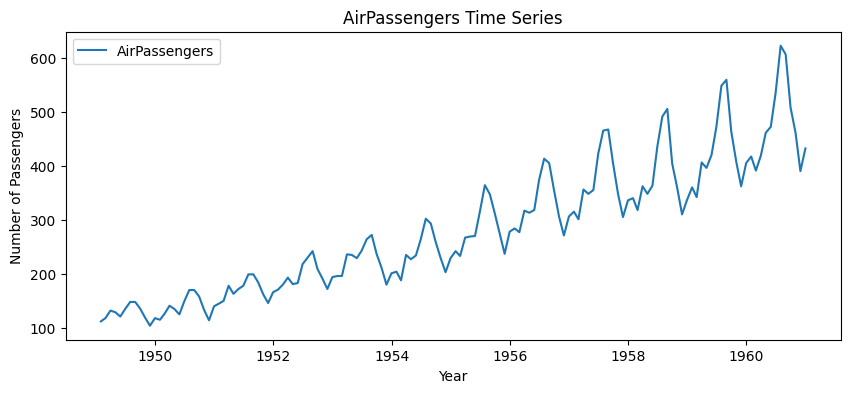

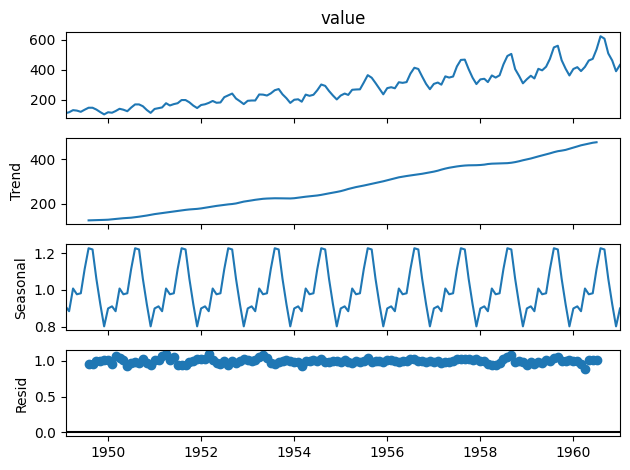

In [1]:
# Question 6: Load a time series dataset (e.g., AirPassengers), plot the original series,
# and decompose it into trend, seasonality, and residual components

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.datasets import get_rdataset

# Load AirPassengers dataset
data = get_rdataset("AirPassengers").data
data['Month'] = pd.date_range(start='1949-01', periods=len(data), freq='M')
data.set_index('Month', inplace=True)

# Original time series
plt.figure(figsize=(10,4))
plt.plot(data['value'], label='AirPassengers')
plt.title("AirPassengers Time Series")
plt.xlabel("Year")
plt.ylabel("Number of Passengers")
plt.legend()
plt.show()

# Decomposition
result = seasonal_decompose(data['value'], model='multiplicative')
result.plot()
plt.show()


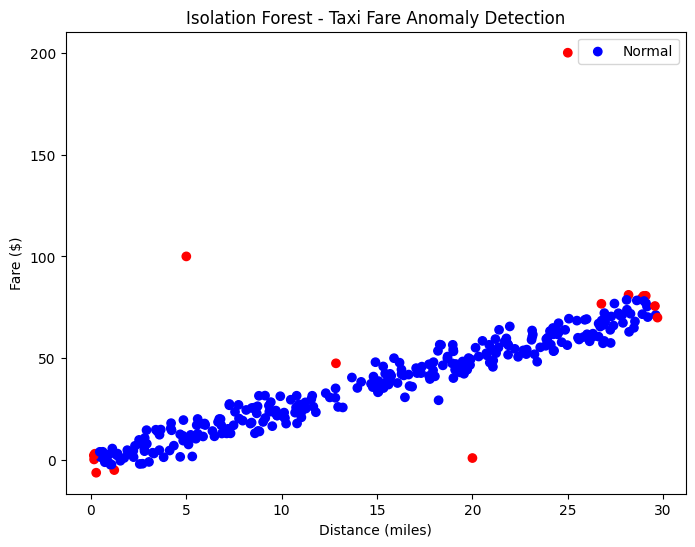

In [2]:
# Question 7: Apply Isolation Forest on a numerical dataset (e.g., NYC Taxi Fare) to
# detect anomalies. Visualize the anomalies on a 2D scatter plot.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Simulated numerical dataset (NYC Taxi Fare style: distance vs fare)
np.random.seed(42)
distance = np.random.uniform(0, 30, 300)
fare = distance * 2.5 + np.random.normal(0, 5, 300)  # normal relation

# Add anomalies (unrealistic fares)
distance = np.append(distance, [5, 20, 25])
fare = np.append(fare, [100, 1, 200])

data = pd.DataFrame({'distance': distance, 'fare': fare})

# Isolation Forest
iso = IsolationForest(contamination=0.05, random_state=42)
data['anomaly'] = iso.fit_predict(data[['distance', 'fare']])

# Visualization
plt.figure(figsize=(8,6))
plt.scatter(data['distance'], data['fare'],
            c=data['anomaly'].map({1:'blue', -1:'red'}),
            label='Normal/Anomaly')
plt.xlabel("Distance (miles)")
plt.ylabel("Fare ($)")
plt.title("Isolation Forest - Taxi Fare Anomaly Detection")
plt.legend(["Normal", "Anomaly"])
plt.show()


/tmp/ipython-input-1849817094.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data['Month'] = pd.date_range(start='1949-01', periods=len(data), freq='M')
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


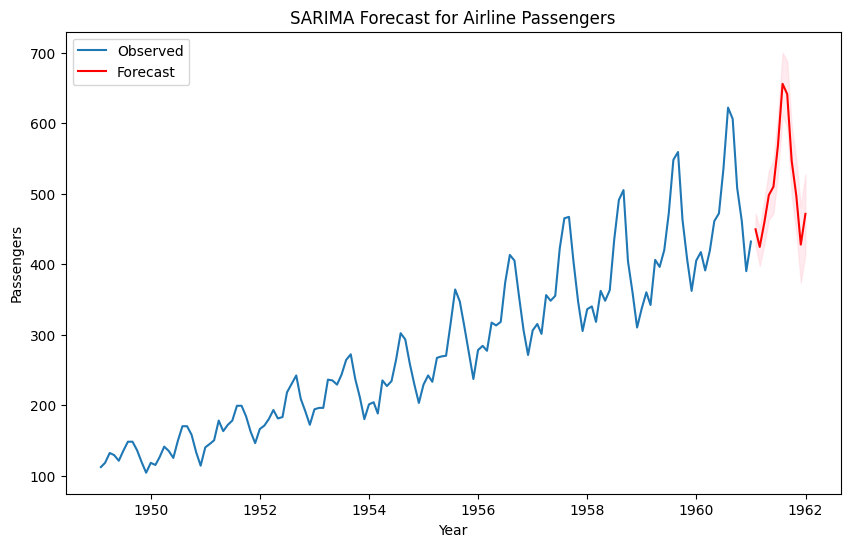

In [3]:
# Question 8: Train a SARIMA model on the monthly airline passengers dataset.
# Forecast the next 12 months and visualize the results.

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.datasets import get_rdataset

# Load AirPassengers dataset
data = get_rdataset("AirPassengers").data
data['Month'] = pd.date_range(start='1949-01', periods=len(data), freq='M')
data.set_index('Month', inplace=True)
ts = data['value']

# Train SARIMA model (example order)
model = SARIMAX(ts, order=(1,1,1), seasonal_order=(1,1,1,12))
result = model.fit(disp=False)

# Forecast next 12 months
forecast = result.get_forecast(steps=12)
pred_ci = forecast.conf_int()

# Plot results
plt.figure(figsize=(10,6))
plt.plot(ts, label="Observed")
plt.plot(forecast.predicted_mean, label="Forecast", color="red")
plt.fill_between(pred_ci.index, pred_ci.iloc[:,0], pred_ci.iloc[:,1],
                 color="pink", alpha=0.3)
plt.xlabel("Year")
plt.ylabel("Passengers")
plt.title("SARIMA Forecast for Airline Passengers")
plt.legend()
plt.show()


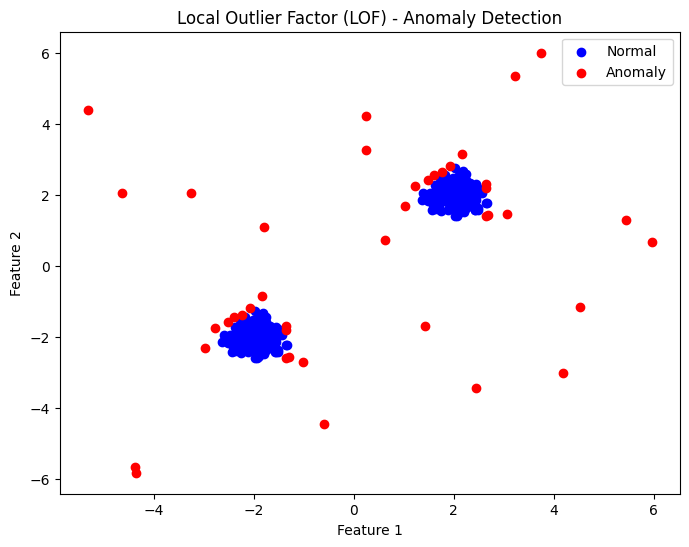

In [4]:
# Question 9: Apply Local Outlier Factor (LOF) on any numerical dataset to detect
# anomalies and visualize them using matplotlib.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

# Simulated dataset (2D numerical data)
np.random.seed(42)
X = 0.3 * np.random.randn(200, 2)
X = np.r_[X + 2, X - 2]   # two clusters

# Add anomalies
X = np.r_[X, np.random.uniform(low=-6, high=6, size=(20, 2))]

# Apply Local Outlier Factor
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = lof.fit_predict(X)

# Visualization
plt.figure(figsize=(8,6))
plt.scatter(X[y_pred==1, 0], X[y_pred==1, 1], c='blue', label="Normal")
plt.scatter(X[y_pred==-1, 0], X[y_pred==-1, 1], c='red', label="Anomaly")
plt.title("Local Outlier Factor (LOF) - Anomaly Detection")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


<!-- Question 10: You are working as a data scientist for a power grid monitoring company.
Your goal is to forecast energy demand and also detect abnormal spikes or drops in
real-time consumption data collected every 15 minutes. The dataset includes features
like timestamp, region, weather conditions, and energy usage.
Explain your real-time data science workflow:
● How would you detect anomalies in this streaming data (Isolation Forest / LOF /
DBSCAN)?
● Which time series model would you use for short-term forecasting (ARIMA /
SARIMA / SARIMAX)?
● How would you validate and monitor the performance over time?
● How would this solution help business decisions or operations? -->


- 1. Anomaly Detection in Streaming Data

Use Isolation Forest or Local Outlier Factor (LOF) for real-time anomaly detection.

Isolation Forest → Efficient for high-dimensional, large-scale data (detect sudden abnormal spikes/drops).

LOF → Useful for detecting local density-based anomalies (regional demand irregularities).

DBSCAN → More suitable for spatial/geographic clustering, less ideal for high-frequency streaming.

Choice: Isolation Forest for real-time streaming due to speed and scalability.

2. Short-Term Forecasting Model

SARIMAX would be the best choice because:

Handles trend + seasonality in energy demand.

Incorporates exogenous variables like temperature, humidity, and region-specific weather.

Alternative: ARIMA for simpler short-term forecasting without seasonality, but less accurate.

3. Validation and Monitoring

Backtesting → Split historical data into rolling windows for training and validation.

Metrics → Use RMSE, MAE, and MAPE for forecast accuracy.

Anomaly detection validation → Precision, recall, F1-score against labeled anomaly events.

Continuous monitoring →

Drift detection (data distribution changes).

Retraining models periodically on the latest data.

Dashboard alerts for anomalies and forecast deviations.

4. Business Impact

Grid Stability: Early detection of abnormal demand prevents blackouts.

Operational Efficiency: Helps allocate resources (e.g., switching on backup generators).

Cost Savings: Optimizes energy distribution, reduces wastage.

Customer Reliability: Ensures uninterrupted power supply during demand surges.

